# Plataforma Nilo Peçanha - Análise Exploratória
## Pós seleção de features


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gc # Garbage collector, para recuperar memória após carregar o data'set inicial
    
%matplotlib inline

In [2]:
path = './microdados_matriculas_2020_idh.csv'

df_original = pd.read_csv(path, 
                 #nrows=5000, 
                 encoding='utf-8', 
                 sep=',')
df_original.T

C:\Users\wagnermc\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,1023293,1023294,1023295,1023296,1023297,1023298,1023299,1023300,1023301,1023302
Categoria da Situação,Concluintes,Em curso,Em curso,Em curso,Em curso,Em curso,Evadidos,Concluintes,Em curso,Em curso,...,Em curso,Evadidos,Em curso,Evadidos,Em curso,Evadidos,Em curso,Em curso,Em curso,Em curso
Situação de Matrícula,Concluída,Em curso,Em curso,Em curso,Em curso,Em curso,Desligada,Concluída,Em curso,Em curso,...,Em curso,Reprovado,Em curso,Reprovado,Em curso,Reprovado,Em curso,Em curso,Em curso,Em curso
Cor / Raça,Não declarada,Não declarada,Não declarada,Não declarada,Não declarada,Não declarada,Preta,Parda,Branca,Não declarada,...,Parda,Preta,Preta,Parda,Parda,Parda,Parda,Preta,Branca,Preta
Eixo Tecnológico,Recursos Naturais,Recursos Naturais,Recursos Naturais,Recursos Naturais,Recursos Naturais,Recursos Naturais,Gestão e Negócios,Gestão e Negócios,Gestão e Negócios,Gestão e Negócios,...,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais,Controle e Processos Industriais
Faixa Etária,20 a 24 anos,20 a 24 anos,30 a 34 anos,20 a 24 anos,20 a 24 anos,20 a 24 anos,45 a 49 anos,20 a 24 anos,20 a 24 anos,30 a 34 anos,...,15 a 19 anos,20 a 24 anos,25 a 29 anos,35 a 39 anos,15 a 19 anos,25 a 29 anos,20 a 24 anos,25 a 29 anos,15 a 19 anos,25 a 29 anos
Modalidade de Ensino,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,...,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial,Educação Presencial
Renda Familiar,Não Declarada,Não Declarada,Não Declarada,Não Declarada,Não Declarada,Não Declarada,"0<RFP<=0,5",Não Declarada,Não Declarada,Não Declarada,...,"0<RFP<=0,5",Não Declarada,"0<RFP<=0,5",Não Declarada,Não Declarada,"0<RFP<=0,5",Não Declarada,"0<RFP<=0,5",Não Declarada,"0,5<RFP<=1,0"
Sexo,Masculino,Masculino,Masculino,Masculino,Masculino,Masculino,Masculino,Feminino,Feminino,Feminino,...,Masculino,Masculino,Feminino,Feminino,Feminino,Masculino,Masculino,Masculino,Feminino,Masculino
Sub Eixo Tecnologico,Agrícola,Agrícola,Agrícola,Agrícola,Agrícola,Agrícola,Gestão e Negócios,Gestão e Negócios,Gestão e Negócios,Gestão e Negócios,...,Automação,Automação,Automação,Automação,Automação,Automação,Automação,Automação,Automação,Automação
Tipo de Curso,Bacharelado,Bacharelado,Bacharelado,Bacharelado,Bacharelado,Bacharelado,Técnico,Tecnologia,Tecnologia,Tecnologia,...,Técnico,Técnico,Técnico,Técnico,Técnico,Técnico,Técnico,Técnico,Técnico,Técnico


In [3]:
df_original.columns

Index(['Categoria da Situação', 'Situação de Matrícula', 'Cor / Raça',
       'Eixo Tecnológico', 'Faixa Etária', 'Modalidade de Ensino',
       'Renda Familiar', 'Sexo', 'Sub Eixo Tecnologico', 'Tipo de Curso',
       'Turno', 'NomMun', 'CodMunDV', 'UF', 'ExpectativaAnosEstudo', 'IDHM',
       'IDHM-Edu'],
      dtype='object')

Parda            363365
Branca           284848
Não declarada    278048
Preta             80863
Amarela           11080
Indígena           5099
Name: Cor / Raça, dtype: int64


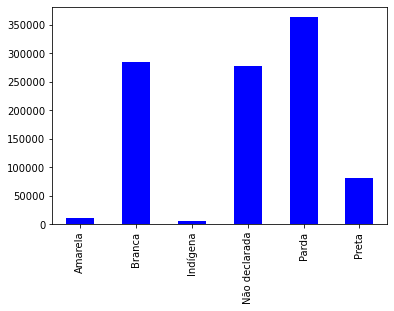

In [4]:
df_original['Cor / Raça'].value_counts().sort_index().plot.bar(color='blue')
print(df_original['Cor / Raça'].value_counts())

In [5]:
#remove linhas cuja ['Cor / Raça'] = 'Não declarada'
df_original = df_original[df_original['Cor / Raça'] != 'Não declarada']

Não Declarada    229835
0<RFP<=0,5       150887
0,5<RFP<=1,0     133126
1,0<RFP<=1,5      95037
1,5<RFP<=2,5      67674
RFP>3,5           37503
2,5<RFP<=3,5      31193
Name: Renda Familiar, dtype: int64


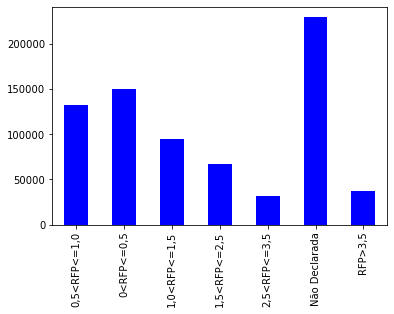

In [6]:
df_original['Renda Familiar'].value_counts().sort_index().plot.bar(color='blue')
print(df_original['Renda Familiar'].value_counts())

In [7]:
#remove linhas cuja ['Renda Familiar'] = 'Não declarada'
df_original = df_original[df_original['Renda Familiar'] != 'Não Declarada']

Noturno          151934
Integral         117166
Matutino          86813
Não se aplica     83797
Vespertino        75710
Name: Turno, dtype: int64


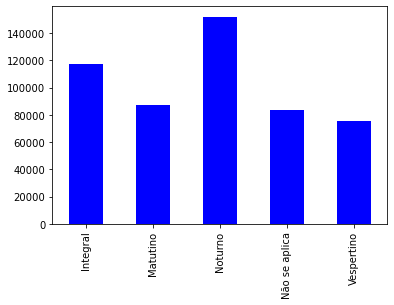

In [8]:
df_original['Turno'].value_counts().sort_index().plot.bar(color='blue')
print(df_original['Turno'].value_counts())

In [9]:
#remove linhas cuja ['Renda Familiar'] = 'Não declarada'
df_original = df_original[df_original['Turno'] != 'Não se aplica']

Técnico                            238719
Bacharelado                         54908
Licenciatura                        42104
Tecnologia                          40958
Qualificação Profissional (FIC)     34519
Especialização (Lato Sensu)          8314
Ensino Médio                         3656
Ensino Fundamental II                3183
Ensino Fundamental I                 2284
Mestrado Profissional                1697
Mestrado                              866
Educação Infantil                     263
Doutorado                             139
Doutorado Profissional                 13
Name: Tipo de Curso, dtype: int64


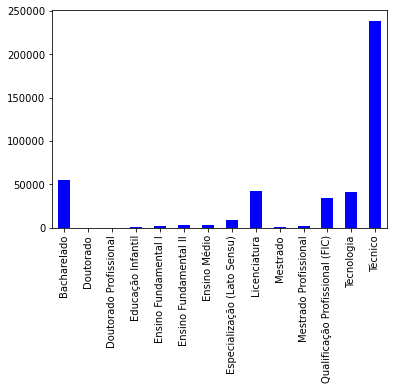

In [10]:
df_original['Tipo de Curso'].value_counts().sort_index().plot.bar(color='blue')
print(df_original['Tipo de Curso'].value_counts())

In [11]:
#remove linhas cujo ['Tipo de Curso'] = 'Ensino Fundamental I' or 'Ensino Fundamental II' or 'Educação Infantil'
tiposCurso = ['Ensino Fundamental I', 'Ensino Fundamental II', 'Educação Infantil', 'Ensino Médio', 'Mestrado Profissional', 
              'Mestrado', 'Doutorado', 'Doutorado Profissional'] 
df_original = df_original[~df_original['Tipo de Curso'].isin(tiposCurso)]

***

**Identificando padrão das matrículas evadidas**

In [12]:
#dataframe apenas com matrículas 'em curso'
df_evadidos = df_original.query('`Categoria da Situação` == "Evadidos"')
df_evadidos.reset_index(drop=True, inplace=True)
len(df_evadidos)

59390

In [13]:
colunasPerfil = [ 'Cor / Raça',
       'Eixo Tecnológico', 'Faixa Etária', 'Modalidade de Ensino',
       'Renda Familiar', 'Tipo de Curso',
       'Turno']

In [14]:
df_evadidos[colunasPerfil]

,Cor / Raça,Eixo Tecnológico,Faixa Etária,Modalidade de Ensino,Renda Familiar,Tipo de Curso,Turno
0,Preta,Gestão e Negócios,45 a 49 anos,Educação Presencial,"0<RFP<=0,5",Técnico,Noturno
1,Parda,Controle e Processos Industriais,20 a 24 anos,Educação Presencial,"0<RFP<=0,5",Técnico,Noturno
2,Branca,Controle e Processos Industriais,20 a 24 anos,Educação Presencial,"1,5<RFP<=2,5",Técnico,Noturno
3,Branca,Informação e Comunicação,30 a 34 anos,Educação Presencial,"1,5<RFP<=2,5",Tecnologia,Noturno
4,Branca,Informação e Comunicação,35 a 39 anos,Educação Presencial,"0<RFP<=0,5",Tecnologia,Noturno
...,...,...,...,...,...,...,...
59385,Parda,"Turismo, Hospitalidade e Lazer",20 a 24 anos,Educação Presencial,"1,0<RFP<=1,5",Tecnologia,Integral
59386,Branca,Informação e Comunicação,15 a 19 anos,Educação Presencial,"RFP>3,5",Técnico,Matutino
59387,Parda,Controle e Processos Industriais,15 a 19 anos,Educação Presencial,"0<RFP<=0,5",Técnico,Noturno
59388,Preta,Controle e Processos Industriais,20 a 24 anos,Educação Presencial,"0<RFP<=0,5",Técnico,Noturno


In [15]:
from collections import Counter

#perfis de evadidos com maior frequência - Brasil
perfis = list(df_evadidos[colunasPerfil].itertuples(index=False, name=None))
print('Brasil')
for itens in Counter(perfis).most_common(5):
    print(itens)
print()

#perfis de evadidos com maior frequência, por UF
#for uf in df_evadidos['UF'].drop_duplicates().sort_values():
#    perfis = list(df_evadidos[df_evadidos[colunasPerfil]][df_evadidos['UF'] == uf].itertuples(index=False, name=None))
#    print(uf)
#    for itens in Counter(perfis).most_common(5):
#        print(itens)
#    print()

Brasil
(('Parda', 'Recursos Naturais', '15 a 19 anos', 'Educação Presencial', '0<RFP<=0,5', 'Técnico', 'Integral'), 367)
(('Parda', 'Recursos Naturais', '15 a 19 anos', 'Educação Presencial', '0,5<RFP<=1,0', 'Técnico', 'Integral'), 273)
(('Parda', 'Desenvolvimento Educacional e Social', '20 a 24 anos', 'Educação Presencial', '0<RFP<=0,5', 'Licenciatura', 'Noturno'), 252)
(('Parda', 'Informação e Comunicação', '20 a 24 anos', 'Educação Presencial', '0<RFP<=0,5', 'Técnico', 'Noturno'), 223)
(('Parda', 'Controle e Processos Industriais', '20 a 24 anos', 'Educação Presencial', '0<RFP<=0,5', 'Técnico', 'Noturno'), 211)



In [16]:
#mantém apenas as colunas que serão utilizadas na análise
colunas = ['Categoria da Situação', 
       'Sub Eixo Tecnologico', 'Tipo de Curso', 'Turno',
       'UF', 'IDHM']
df_original = df_original[colunas]

**Encoding das features**  
É feito com toda a base para evitar o erro *Found unknown categories*

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
#enc = ColumnTransformer([("encoder", OneHotEncoder(handle_unknown='ignore', sparse=True), [0,1,2])], remainder = 'passthrough').fit(X)
enc = ColumnTransformer([("encoder", OrdinalEncoder(), list(range(0,len(df_original.columns)-2)))], remainder = 'passthrough').fit(df_original[df_original.columns[1:]])
print(enc.transform(df_original[df_original.columns[1:]]))

[[19.     5.     2.    25.     0.75 ]
 [27.     5.     1.    22.     0.697]
 [22.     5.     1.    20.     0.731]
 ...
 [ 5.     5.     2.     9.     0.564]
 [ 5.     5.     2.     9.     0.564]
 [ 5.     5.     2.     9.     0.564]]


In [18]:
#base para modelagem (1% do total de registros)
df =  df_original.sample(frac=.02)
df.T

,843187,474279,812689,31465,60186,778754,994960,808875,632370,392463,...,729797,160404,278717,998653,453535,829428,4308,209294,415878,651620
Categoria da Situação,Em curso,Em curso,Em curso,Em curso,Concluintes,Em curso,Em curso,Evadidos,Em curso,Evadidos,...,Evadidos,Em curso,Em curso,Evadidos,Em curso,Em curso,Em curso,Concluintes,Em curso,Evadidos
Sub Eixo Tecnologico,Agrícola,Informática,Gestão e Negócios,Informática,Desenvolvimento Educacional,Gestão e Negócios,Hospitalidade,Desenvolvimento Educacional e Social,Civil,Informática,...,Gestão e Negócios,Desenvolvimento Educacional,Civil,Mecânica,Química,Civil,Desenvolvimento Educacional,Agrícola,Agrícola,Pecuária
Tipo de Curso,Técnico,Bacharelado,Técnico,Tecnologia,Licenciatura,Técnico,Técnico,Qualificação Profissional (FIC),Técnico,Tecnologia,...,Técnico,Licenciatura,Técnico,Técnico,Técnico,Técnico,Licenciatura,Bacharelado,Bacharelado,Bacharelado
Turno,Matutino,Integral,Matutino,Matutino,Noturno,Matutino,Matutino,Vespertino,Integral,Noturno,...,Noturno,Vespertino,Matutino,Noturno,Matutino,Matutino,Matutino,Integral,Integral,Integral
UF,PI,MA,MA,MS,RS,MA,PE,SP,MG,SP,...,BA,RJ,PB,MG,RS,ES,RS,MG,MG,MA
IDHM,0.642,0.731,0.618,0.7,0.751,0.564,0.686,0.767,0.753,0.79,...,0.677,0.771,0.64,0.753,0.761,0.746,0.769,0.74,0.789,0.768


Em curso       5967
Concluintes    1274
Evadidos       1149
Name: Categoria da Situação, dtype: int64


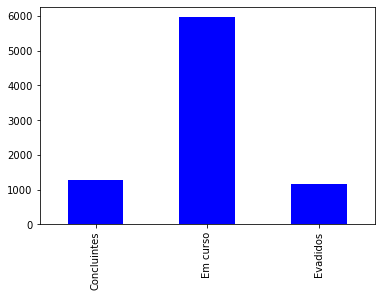

In [19]:
df['Categoria da Situação'].value_counts().sort_index().plot.bar(color='blue')
print(df['Categoria da Situação'].value_counts())

In [20]:
#dataframe das matrículas 'concluintes' e 'evadidos'
df.query('`Categoria da Situação` != "Em curso"', inplace=True)
df.reset_index(drop=True, inplace=True)
df.T

,0,1,2,3,4,5,6,7,8,9,...,2413,2414,2415,2416,2417,2418,2419,2420,2421,2422
Categoria da Situação,Concluintes,Evadidos,Evadidos,Evadidos,Evadidos,Evadidos,Concluintes,Concluintes,Evadidos,Evadidos,...,Concluintes,Concluintes,Evadidos,Evadidos,Concluintes,Concluintes,Evadidos,Evadidos,Concluintes,Evadidos
Sub Eixo Tecnologico,Desenvolvimento Educacional,Desenvolvimento Educacional e Social,Informática,Hospitalidade,Informática,Desenvolvimento Educacional,Hospitalidade,Desenvolvimento Educacional,Gestão e Negócios,Desenvolvimento Educacional e Social,...,Vestuário,Gestão e Negócios,Desenvolvimento Educacional e Social,Agrícola,Química,Química,Gestão e Negócios,Mecânica,Agrícola,Pecuária
Tipo de Curso,Licenciatura,Qualificação Profissional (FIC),Tecnologia,Técnico,Bacharelado,Qualificação Profissional (FIC),Qualificação Profissional (FIC),Qualificação Profissional (FIC),Tecnologia,Qualificação Profissional (FIC),...,Técnico,Técnico,Especialização (Lato Sensu),Técnico,Técnico,Técnico,Técnico,Técnico,Bacharelado,Bacharelado
Turno,Noturno,Vespertino,Noturno,Noturno,Noturno,Vespertino,Vespertino,Matutino,Noturno,Vespertino,...,Noturno,Integral,Matutino,Vespertino,Integral,Vespertino,Noturno,Noturno,Integral,Integral
UF,RS,SP,SP,BA,MG,PB,MT,CE,RS,DF,...,SC,MG,PA,SC,MG,SP,BA,MG,MG,MA
IDHM,0.751,0.767,0.79,0.685,0.656,0.613,0.755,0.657,0.75,0.824,...,0.803,0.764,0.645,0.696,0.77,0.761,0.677,0.753,0.74,0.768


In [21]:
# Separa as variáveis independentes (features = X) da variável dependente (target = y)
X = df.drop(['Categoria da Situação'], axis=1)
y = df['Categoria da Situação']

In [22]:
# treinamento do modelo
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix
from sklearn import svm
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [23]:
# Partição treino/teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
X_train.shape, y_train.shape

((1938, 5), (1938,))

In [25]:
X_test.shape, y_test.shape

((485, 5), (485,))

In [26]:
print(enc.transform(X_train))
X

[[12.     3.     2.     7.     0.667]
 [ 6.     5.     2.    18.     0.716]
 [19.     5.     2.    22.     0.776]
 ...
 [11.     3.     3.    22.     0.751]
 [ 1.     0.     0.     7.     0.746]
 [22.     3.     3.    15.     0.697]]


,Sub Eixo Tecnologico,Tipo de Curso,Turno,UF,IDHM
0,Desenvolvimento Educacional,Licenciatura,Noturno,RS,0.751
1,Desenvolvimento Educacional e Social,Qualificação Profissional (FIC),Vespertino,SP,0.767
2,Informática,Tecnologia,Noturno,SP,0.790
3,Hospitalidade,Técnico,Noturno,BA,0.685
4,Informática,Bacharelado,Noturno,MG,0.656
...,...,...,...,...,...
2418,Química,Técnico,Vespertino,SP,0.761
2419,Gestão e Negócios,Técnico,Noturno,BA,0.677
2420,Mecânica,Técnico,Noturno,MG,0.753
2421,Agrícola,Bacharelado,Integral,MG,0.740


# Regressão logística

In [27]:
# Modelo básico de regressão logística
logreg_clf = LogisticRegression(max_iter=1000).fit(enc.transform(X_train), y_train)
print(logreg_clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, logreg_clf.predict(enc.transform(X_test)), average='weighted')

0.5505154639175258


0.5390783486372406

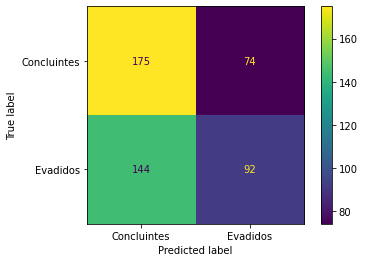

In [28]:
#matriz de confusão
plot_confusion_matrix(logreg_clf, enc.transform(X_test), y_test);

In [29]:
#testando o modelo logreg
print('Valor original: ' + y.iloc[225])
print('Valor predito: ' + logreg_clf.predict(enc.transform(X.iloc[[225]]))[0])

Valor original: Evadidos
Valor predito: Concluintes


**Importância das features**

In [30]:
from sklearn.feature_selection import RFE

selector = RFE(logreg_clf, n_features_to_select=1)
selector = selector.fit(enc.transform(X_train), y_train)

order = selector.ranking_
order

array([4, 3, 2, 5, 1])

In [31]:
feature_ranks = []
for i in order:
    feature_ranks.append(f"{X_train.columns[i-1]}")
    
feature_ranks

['UF', 'Turno', 'Tipo de Curso', 'IDHM', 'Sub Eixo Tecnologico']

**Curva ROC**

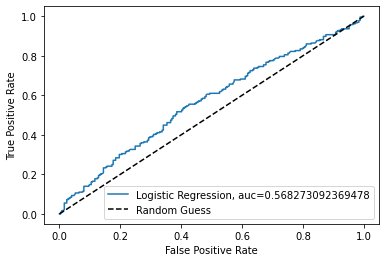

In [32]:
y_pred_proba = logreg_clf.predict_proba(enc.transform(X_test))[::,1]
#print(y_pred_proba)
fpr_logreg, tpr_logreg, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Evadidos')
auc_logreg = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_logreg,tpr_logreg,label="Logistic Regression, auc="+str(auc_logreg))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

# SVM

In [33]:
#svm
svm_clf = svm.SVC(C=1.0, probability=True).fit(enc.transform(X_train), y_train)
print(svm_clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, svm_clf.predict(enc.transform(X_test)), average='weighted')

0.5567010309278351


0.5444855933503755

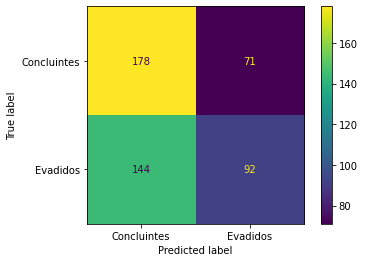

In [34]:
#matriz de confusão
plot_confusion_matrix(svm_clf, enc.transform(X_test), y_test)

In [35]:
#testando o modelo SVM
print('Valor original: ' + y.iloc[115])
print('Valor predito: ' + svm_clf.predict(enc.transform(X.iloc[[115]]))[0])

Valor original: Evadidos
Valor predito: Evadidos


**Curva ROC**

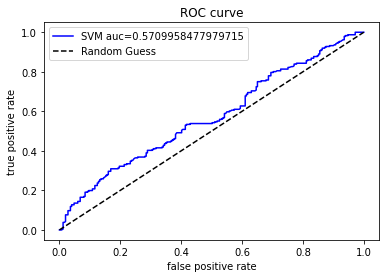

In [36]:
decision_scores = svm_clf.decision_function(enc.transform(X_test))
fpr_svm, tpr_svm, thres = metrics.roc_curve(y_test, decision_scores, pos_label='Evadidos')
auc_svm = metrics.roc_auc_score(y_test, decision_scores)

# roc curve
plt.plot(fpr_svm, tpr_svm, "b", label='SVM auc='+str(auc_svm))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.xlabel("false positive rate")
plt.ylabel("true positive rate")
plt.legend(loc="best")
plt.title("ROC curve")
plt.show()

# Árvore de decisão

In [37]:
#Árvore de decisão Classificador
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_clf = DecisionTreeClassifier(max_depth=6).fit(enc.transform(X_train), y_train)
print(dt_clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, dt_clf.predict(enc.transform(X_test)), average='weighted')

0.5938144329896907


0.5914395369877272

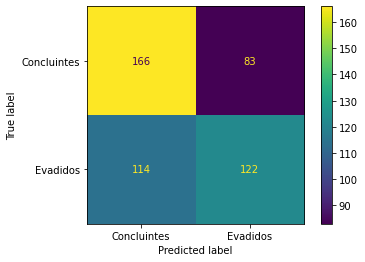

In [38]:
#matriz de confusão
plot_confusion_matrix(dt_clf, enc.transform(X_test), y_test);

In [39]:
#testando o modelo Decision Tree
print('Valor original: ' + y.iloc[115])
print('Valor predito: ' + dt_clf.predict(enc.transform(X.iloc[[115]]))[0])

Valor original: Evadidos
Valor predito: Evadidos


In [40]:
#plt.figure(figsize=(20,10))
#plot_tree(dt_clf, filled=True, fontsize=12, feature_names=X_train.columns, class_names= df.columns.values[0])
#plot_tree(dt_clf, filled=True, fontsize=12, feature_names=df.columns)
#plt.show()

**Curva ROC**

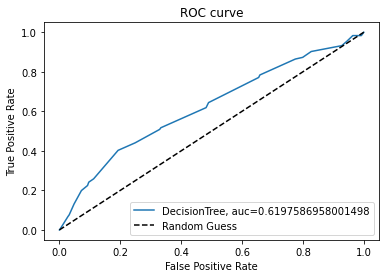

In [41]:
y_pred_proba = dt_clf.predict_proba(enc.transform(X_test))[::,1]
fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Evadidos')
auc_dt = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_dt,tpr_dt,label="DecisionTree, auc="+str(auc_dt))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

# Random Forest

In [42]:
#Random Forest Classificador
from sklearn.ensemble import RandomForestClassifier


rf_clf = RandomForestClassifier(n_estimators=100, max_depth=6).fit(enc.transform(X_train), y_train)
print(rf_clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, rf_clf.predict(enc.transform(X_test)), average='weighted')

0.5938144329896907


0.589943318029182

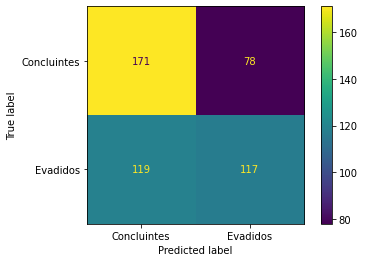

In [43]:
#matriz de confusão
plot_confusion_matrix(rf_clf, enc.transform(X_test), y_test);

In [44]:
#testando o modelo Random Forest
print('Valor original: ' + y.iloc[115])
print('Valor predito: ' + rf_clf.predict(enc.transform(X.iloc[[115]]))[0])

Valor original: Evadidos
Valor predito: Evadidos


**Importância das features**

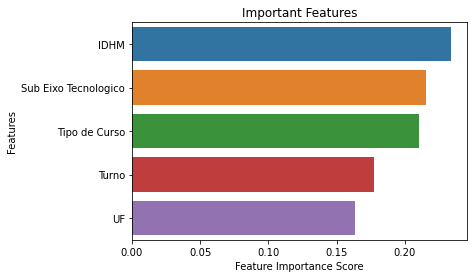

In [45]:
feature_imp = pd.Series(rf_clf.feature_importances_,index=X_train.columns).sort_values(ascending=False)
feature_imp
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
plt.show()

**Curva ROC**

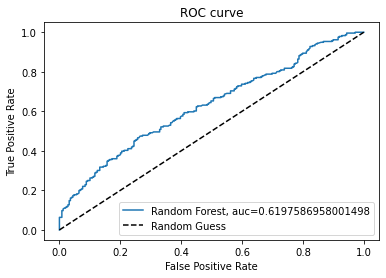

In [46]:
y_pred_proba = rf_clf.predict_proba(enc.transform(X_test))[::,1]
fpr_rf, tpr_rf, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Evadidos')
auc_rf = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc="+str(auc_dt))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

# Gaussian Naive Bayes

In [47]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB

nb_clf = GaussianNB().fit(enc.transform(X_train), y_train)
print(nb_clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, nb_clf.predict(enc.transform(X_test)), average='weighted')

0.5443298969072164


0.5364361653915747

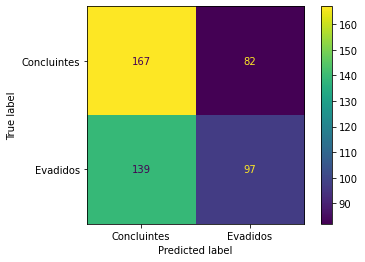

In [48]:
#matriz de confusão
plot_confusion_matrix(nb_clf, enc.transform(X_test), y_test);

In [49]:
#testando o modelo Naive Bayes
print('Valor original: ' + y.iloc[115])
print('Valor predito: ' + nb_clf.predict(enc.transform(X.iloc[[115]]))[0])

Valor original: Evadidos
Valor predito: Evadidos


**Curva ROC**

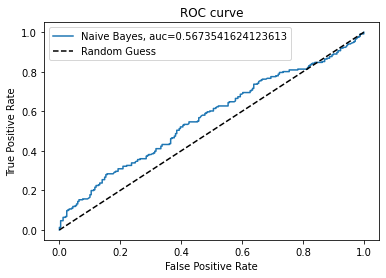

In [50]:
y_pred_proba = nb_clf.predict_proba(enc.transform(X_test))[::,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Evadidos')
auc_nb = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes, auc="+str(auc_nb))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

# Ensemble
Conjunto de modelos cujo resultado médio supera o de todos os integrantes do modelo

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import VotingClassifier


#Hard Voting
#en_clf = VotingClassifier(
#    estimators=[('log_reg', logreg_clf), ('SVM', svm_clf), ('tree', dt_clf),('RF', rf_clf), ('gnb', nb_clf)],
#    voting='hard').fit(enc.transform(X_train), y_train)

#print('Hard voting')
#for clf, label in zip([logreg_clf, svm_clf, dt_clf, rf_clf, nb_clf, en_clf], 
#                      ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Ensemble']):
#    scores = cross_val_score(clf, enc.transform(X_train), y_train, scoring='accuracy', cv=5)
#    print(f"{label} : {scores.mean():0.3f} (+/- {scores.std():0.3f})")

In [52]:
#Soft Voting
en_clf = VotingClassifier(
    estimators=[('log_reg', logreg_clf), ('SVM', svm_clf), ('tree', dt_clf),('RF', rf_clf), ('gnb', nb_clf)],
    voting='soft').fit(enc.transform(X_train), y_train)

print('Soft voting')
for clf, label in zip([logreg_clf, svm_clf, dt_clf, rf_clf, nb_clf, en_clf], 
                      ['Logistic Regression', 'SVM', 'Decision Tree', 'Random Forest', 'Gaussian Naive Bayes', 'Ensemble']):
    scores = cross_val_score(clf, enc.transform(X_train), y_train, scoring='accuracy', cv=5)
    print(f"{label} : {scores.mean():0.3f} (+/- {scores.std():0.3f})")

Soft voting
Logistic Regression : 0.561 (+/- 0.012)
SVM : 0.555 (+/- 0.016)
Decision Tree : 0.594 (+/- 0.010)
Random Forest : 0.618 (+/- 0.013)
Gaussian Naive Bayes : 0.577 (+/- 0.022)
Ensemble : 0.593 (+/- 0.024)


In [53]:
print(en_clf.score(enc.transform(X_test), y_test))
metrics.f1_score(y_test, en_clf.predict(enc.transform(X_test)), average='weighted')

0.5855670103092784


0.5753050777327466

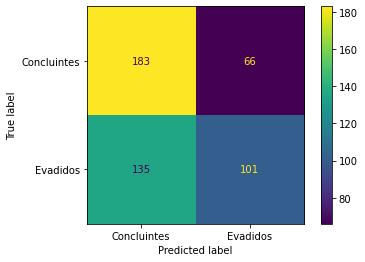

In [54]:
#matriz de confusão
plot_confusion_matrix(en_clf, enc.transform(X_test), y_test);

In [55]:
#testando o modelo Ensemble
print('Valor original: ' + y.iloc[115])
print('Valor predito: ' + en_clf.predict(enc.transform(X.iloc[[115]]))[0])

Valor original: Evadidos
Valor predito: Evadidos


**Curva ROC**

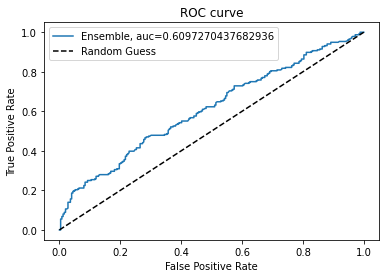

In [56]:
y_pred_proba = en_clf.predict_proba(enc.transform(X_test))[::,1]
fpr_en, tpr_en, _ = metrics.roc_curve(y_test,  y_pred_proba, pos_label='Evadidos')
auc_en = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr_en,tpr_en,label="Ensemble, auc="+str(auc_en))
plt.plot([0,1],[0,1], "k--", label='Random Guess')
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

**Curva ROC Geral**

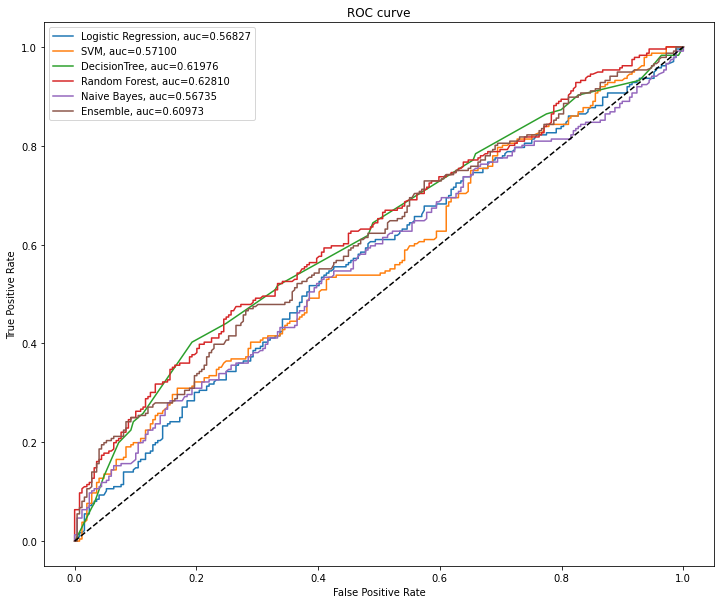

In [57]:
plt.figure(figsize=(12,10))
plt.plot(fpr_logreg, tpr_logreg, label="Logistic Regression, auc=" + f'{auc_logreg:.5f}') 
plt.plot(fpr_svm,tpr_svm, label="SVM, auc=" + f'{auc_svm:.5f}')
plt.plot(fpr_dt,tpr_dt,label="DecisionTree, auc=" + f'{auc_dt:.5f}')
plt.plot(fpr_rf,tpr_rf,label="Random Forest, auc=" + f'{auc_rf:.5f}')
plt.plot(fpr_nb,tpr_nb,label="Naive Bayes, auc=" + f'{auc_nb:.5f}')
plt.plot(fpr_en,tpr_en,label="Ensemble, auc=" + f'{auc_en:.5f}')
plt.plot([0,1],[0,1], "k--")
plt.legend(loc='best')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC curve")
plt.show()

***

# Aplicando modelo preditivo às matrículas "em curso"

In [58]:
#base para aplicação do modelo e subsequente comparação com proporção de dados reais (10% do total de registros)
df_real =  df_original.sample(frac=.1)

In [59]:
#dataframe apenas com matrículas 'em curso'
df_emCurso = df_real.query('`Categoria da Situação` == "Em curso"')
df_emCurso.reset_index(drop=True, inplace=True)

In [60]:
#dataframe das matrículas 'concluintes' e 'evadidos': situacao terminal
df_real.query('`Categoria da Situação` != "Em curso"', inplace=True)
df_real.reset_index(drop=True, inplace=True)

In [61]:
#Aplicando classificador Random Forest
predict_categoria_situacao = rf_clf.predict(enc.transform(df_emCurso[df_emCurso.columns[1:]]))

In [62]:
#adicionando predição ao dataset df_emCurso
df_emCurso = pd.concat([df_emCurso, pd.DataFrame(predict_categoria_situacao,columns=['CategoriaPredict'])], axis=1)

In [63]:
print('Proporção por situação')
print()
print('real:')
print(df_real['Categoria da Situação'].value_counts(normalize=True, ascending=True).sort_index(ascending=True))
print()
print('Preditos:')
print(df_emCurso['CategoriaPredict'].value_counts(normalize=True, ascending=True).sort_index(ascending=True))

Proporção por situação

real:
Concluintes    0.512317
Evadidos       0.487683
Name: Categoria da Situação, dtype: float64

Preditos:
Concluintes    0.472503
Evadidos       0.527497
Name: CategoriaPredict, dtype: float64


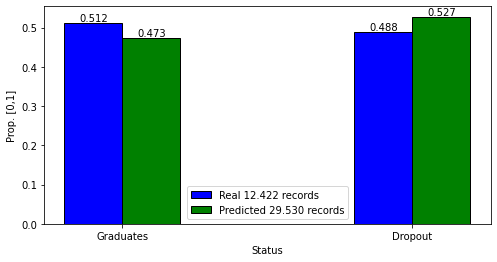

In [82]:
import locale
locale.setlocale(locale.LC_ALL, '') 

#gráfico comparativo entre proporção real x predita
real = df_real['Categoria da Situação'].value_counts(normalize=True, ascending=True).sort_index(ascending=True)
predito = df_emCurso['CategoriaPredict'].value_counts(normalize=True, ascending=True).sort_index(ascending=True)

  
n=2
r = np.arange(n)
width = 0.2
  
plt.figure(figsize=(8,4))  
bars1 = plt.bar(r, real, color = 'b',
        width = width, edgecolor = 'black',
        label='Real '  + f'{len(df_real):n}' + ' records')
bars2 = plt.bar(r + width, predito, color = 'g',
        width = width, edgecolor = 'black',
        label='Predicted ' + f'{len(df_emCurso):n}' + ' records')
  
plt.xlabel("Status")
plt.ylabel("Prop. [0,1]")
#plt.title("Proportion of enrollment status in relation to total registrations - Real x Predicted\nModeling after feature selection")
  
#plt.grid(linestyle='--')
plt.xticks(r + width/2,['Graduates','Dropout'])
plt.legend(loc='best')

for bar1, bar2 in zip(bars1, bars2):
    yval = bar1.get_height()
    plt.text(bar1.get_x() + width/2, yval + .005, f'{yval:.3f}', ha='center')
    yval = bar2.get_height()
    plt.text(bar2.get_x() + width/2, yval + .005, f'{yval:.3f}', ha='center')

  
plt.show()

**Verificando taxa de acerto da predição na base de matrículas 'concluintes' e 'evadidos'**

In [65]:
#Aplicando classificador Random Forest na base de matrículas 'concluintes' e 'evadidos'
predict_categoria_situacao_real = rf_clf.predict(enc.transform(df_real[df_real.columns[1:]]))

#adicionando predição ao dataset df_real
df_real = pd.concat([df_real, pd.DataFrame(predict_categoria_situacao_real,columns=['CategoriaPredict'])], axis=1)

#verificando acerto da predição
df_real['PredicaoCorreta'] = df_real['Categoria da Situação'] == df_real['CategoriaPredict']

In [66]:
#taxa de acerto da predição
print(df_real['PredicaoCorreta'].value_counts(normalize=True, ascending=True).sort_index(ascending=True))

False    0.389631
True     0.610369
Name: PredicaoCorreta, dtype: float64


***

**Identificando padrão das matrículas evadidas**

In [67]:
#dataframe apenas com matrículas 'em curso'
df_evadidos = df_original.query('`Categoria da Situação` == "Evadidos"')
df_evadidos.reset_index(drop=True, inplace=True)
len(df_evadidos)

59390

In [68]:
from collections import Counter

#perfis de evadidos com maior frequência - Brasil
perfis = list(df_evadidos[df_evadidos.columns[1:4]].itertuples(index=False, name=None))
print('Brasil')
for itens in Counter(perfis).most_common(5):
    print(itens)
print()

#perfis de evadidos com maior frequência, por UF
for uf in df_evadidos['UF'].drop_duplicates().sort_values():
    perfis = list(df_evadidos[df_evadidos.columns[1:4]][df_evadidos['UF'] == uf].itertuples(index=False, name=None))
    #perfis = list(df_evadidos[df_evadidos['UF'] == uf].itertuples(index=False, name=None))
    print(uf)
    for itens in Counter(perfis).most_common(5):
        print(itens)
    print()

Brasil
(('Desenvolvimento Educacional', 'Licenciatura', 'Noturno'), 3470)
(('Gestão e Negócios', 'Técnico', 'Noturno'), 2450)
(('Agrícola', 'Técnico', 'Integral'), 1950)
(('Informática', 'Técnico', 'Noturno'), 1613)
(('Desenvolvimento Educacional', 'Qualificação Profissional (FIC)', 'Vespertino'), 1355)

AC
(('Gestão e Negócios', 'Técnico', 'Noturno'), 85)
(('Agrícola', 'Técnico', 'Vespertino'), 34)
(('Pesca', 'Técnico', 'Matutino'), 30)
(('Desenvolvimento Educacional', 'Licenciatura', 'Noturno'), 26)
(('Agrícola', 'Técnico', 'Matutino'), 21)

AL
(('Agrícola', 'Técnico', 'Matutino'), 126)
(('Informática', 'Técnico', 'Matutino'), 94)
(('Gestão e Negócios', 'Técnico', 'Vespertino'), 63)
(('Meio Ambiente', 'Técnico', 'Matutino'), 59)
(('Turismo', 'Técnico', 'Vespertino'), 48)

AM
(('Gestão e Negócios', 'Técnico', 'Noturno'), 194)
(('Informática', 'Técnico', 'Noturno'), 158)
(('Agrícola', 'Técnico', 'Integral'), 144)
(('Informática', 'Técnico', 'Integral'), 109)
(('Gestão e Negócios', 'Téc

***
## Regras de associação

In [69]:
#características que serão avaliadas
caracteristicas = list(df_evadidos[df_evadidos.columns[1:4]].itertuples(index=False, name=None))
caracteristicas = caracteristicas[0:999]
caracteristicas

[('Gestão e Negócios', 'Técnico', 'Noturno'),
 ('Automação', 'Técnico', 'Noturno'),
 ('Automação', 'Técnico', 'Noturno'),
 ('Informática', 'Tecnologia', 'Noturno'),
 ('Informática', 'Tecnologia', 'Noturno'),
 ('Informática', 'Tecnologia', 'Noturno'),
 ('Gestão e Negócios', 'Tecnologia', 'Noturno'),
 ('Gestão e Negócios', 'Tecnologia', 'Matutino'),
 ('Gestão e Negócios', 'Tecnologia', 'Matutino'),
 ('Gestão e Negócios', 'Tecnologia', 'Matutino'),
 ('Elétrica', 'Técnico', 'Matutino'),
 ('Elétrica', 'Técnico', 'Matutino'),
 ('Automação', 'Técnico', 'Noturno'),
 ('Agrícola', 'Técnico', 'Matutino'),
 ('Agrícola', 'Técnico', 'Matutino'),
 ('Agrícola', 'Técnico', 'Matutino'),
 ('Pecuária', 'Bacharelado', 'Integral'),
 ('Automação', 'Tecnologia', 'Noturno'),
 ('Automação', 'Tecnologia', 'Noturno'),
 ('Automação', 'Tecnologia', 'Noturno'),
 ('Meio Ambiente', 'Técnico', 'Matutino'),
 ('Recursos Minerais', 'Técnico', 'Vespertino'),
 ('Recursos Minerais', 'Técnico', 'Vespertino'),
 ('Gestão e Negó

In [70]:
#identifica as regras de associação usando a biblioteca efficient_apriori
from efficient_apriori import apriori

itemsets, rules = apriori(caracteristicas, output_transaction_ids=True,  min_support=0.2,  min_confidence=1)

print("Regras de associação (efficient_apriori):")
for rule in rules:
    print(rule)

Regras de associação (efficient_apriori):


In [71]:
#identifica as regras de associação usando a biblioteca mlxtend
from mlxtend.frequent_patterns import apriori, association_rules


# Defining the hot encoding function to make the data suitable
# for the concerned libraries
def hot_encode(x):
    if(x<= 0):
        return 0
    if(x>= 1):
        return 1
 


caracteristicas = df_evadidos[df_evadidos.columns[1:4]]
frq_items = apriori(caracteristicas, min_support = 0.05, use_colnames = True)
 
# Collecting the inferred rules in a dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
rules = rules.sort_values(['confidence', 'lift'], ascending =[False, False])
print(rules.head())

ValueError: The allowed values for a DataFrame are True, False, 0, 1. Found value Gestão e Negócios